<a href="https://githubtocolab.com/pinshuai/modvis/blob/master/examples/notebooks/model_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

# Model evaluation

This example shows how to load model and observation data and evalute model performance. 

In [1]:
# # skip this if package has already been installed
# !pip install modvis

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
import pandas as pd
from modvis import ATSutils
from modvis import utils
from modvis import general_plots as gp

import matplotlib.pyplot as plt

import logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(name)s - %(levelname)s: %(message)s')

In [3]:
# run_steadystate = "1-spinup_steadystate"
#work_dir = f"../../model2/"
work_dir = f"../../ats-output/model/"            # for the first file
#work_dir = f"../../ats-output/modelApr22/model/"  # for the modelApr22 run

rho_m = 55500 # moles/m^3, water molar density. Check this in the xml input file.

In [4]:
# model_dir = "../data/coalcreek"

Download the sample data when running on `Google Colab`

In [5]:
# import os
# if not os.path.exists(model_dir):
#   !git clone https://github.com/pinshuai/modvis.git
#   %cd ./modvis/examples/notebooks

## Load model data

This will load the `water_balance-daily.dat` file generated from ATS model. The data file includes watershed variables including outlet discharge, ET, and etc.

In [6]:
run_dir = "3-transient"
model_dir = os.path.join(work_dir, run_dir)
logging.info(f"Loading data from {model_dir}")

2025-04-23 16:18:35,084 - root - INFO: Loading data from ../../ats-output/model/3-transient


In [7]:
simu_df = ATSutils.load_waterBalance(model_dir, WB_filename="water_balance_computational_domain.csv",
                             domain_names = None,
                                canopy = True, plot = False
                               )

## Load observation data

Provide USGS gage number (i.e., `sites`) to download the streamflow. 

In [8]:
#obs_df = utils.load_nwis(sites= "09111250", start = '2015-10-01', end = '2017-10-1')
df_1 = pd.read_csv('../../LRO_data/LR_FB_BA_SourceID_1_QC_0_Year_2021.csv', sep=',', comment='#', parse_dates=['LocalDateTime'],index_col='LocalDateTime', na_values='-9999')
df_2 = pd.read_csv('../../LRO_data/LR_FB_BA_SourceID_1_QC_0_Year_2022.csv', sep=',', comment='#', parse_dates=['LocalDateTime'],index_col='LocalDateTime', na_values='-9999')
df_3 = pd.read_csv('../../LRO_data/LR_FB_BA_SourceID_1_QC_0_Year_2023.csv', sep=',', comment='#', parse_dates=['LocalDateTime'],index_col='LocalDateTime', na_values='-9999')


#obs_df = utils.load_nwis(sites= "09111250", start = '2015-10-01', end = '2017-10-1')
#obs_df = pd.read_csv('../../LRO_data/LR_FB_BA - Discharge_cms - Discharge_All.csv', sep=',', comment='#', parse_dates=['DateTime'],index_col='DateTime', na_values='-9999')
#obs_df.head(2)


In [9]:
df_merged = pd.concat([df_1, df_2, df_3]).sort_index()

In [10]:
df_merged = df_merged.reset_index().set_index('DateTimeUTC')
#df_merged.head(2)

In [11]:
df_merged['Discharge [m^3/d]'] = df_merged['Discharge_cms'] * 86400
df_merged = df_merged[['Discharge_cms', 'Discharge [m^3/d]']]
obs_df = df_merged
obs_df.head(2)

,Discharge_cms,Discharge [m^3/d]
DateTimeUTC,,
2021-01-01 07:00:00,0.267876,23144.513023
2021-01-01 07:15:00,0.268642,23210.638186


In [12]:
print(obs_df.index.min())
print(obs_df.index.max())

2021-01-01 07:00:00
2024-01-01 06:45:00


In [13]:
obs_df.reset_index(inplace=True)
obs_df.head(2)

,DateTimeUTC,Discharge_cms,Discharge [m^3/d]
0,2021-01-01 07:00:00,0.267876,23144.513023
1,2021-01-01 07:15:00,0.268642,23210.638186


In [14]:
print(obs_df.columns)

Index(['DateTimeUTC', 'Discharge_cms', 'Discharge [m^3/d]'], dtype='object')


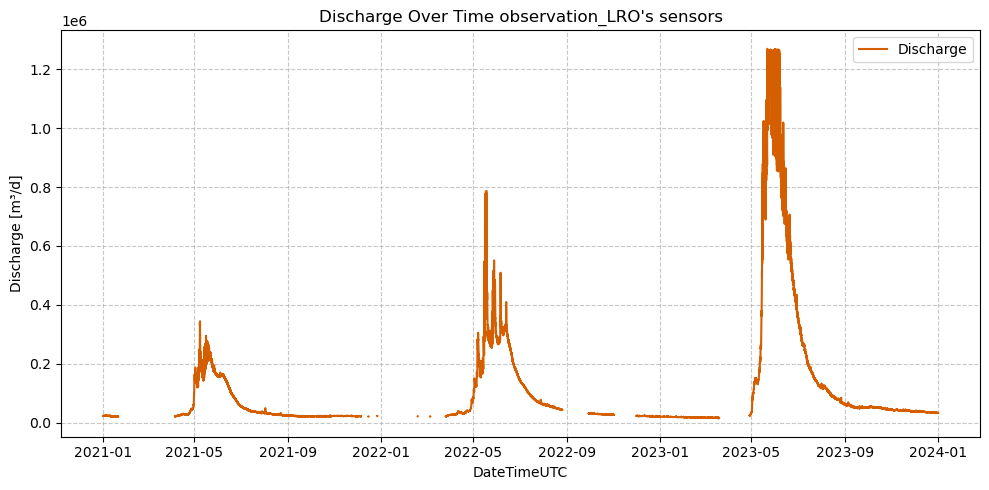

In [15]:
obs_df['DateTimeUTC'] = pd.to_datetime(obs_df['DateTimeUTC'])

# Plot
plt.figure(figsize=(10, 5))
plt.plot(obs_df['DateTimeUTC'], obs_df['Discharge [m^3/d]'], label='Discharge', color='#D55E00')
plt.xlabel('DateTimeUTC')
plt.ylabel('Discharge [m³/d]')
plt.title("Discharge Over Time observation_LRO's sensors")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()


# Optional: Save the figure
plt.savefig('../figures/observation time-series.png',dpi=300)

plt.show()

In [16]:
obs_df = obs_df.reset_index().set_index('DateTimeUTC')

## Streamflow comparison

Compare simulated streamflow with observed USGS streamflow.

In [17]:
simu_df.head(2)

,time [d],net runoff [mol d^-1],runoff only [mol d^-1],runon only [mol d^-1],river discharge [mol d^-1],net groundwater flux [mol d^-1],exfiltration [mol d^-1],rain precipitation [m d^-1],snow precipitation [m d^-1],surface evaporation [m d^-1],...,snow precipitation [mm d^-1],snowmelt [mm d^-1],watershed boundary discharge [m^3/d],watershed boundary discharge [m d^-1],total evapotranspiration [mm d^-1],snow water content [m],surface water content [m],subsurface water content [m],canopy water content [m],total water content [m]
datetime,,,,,,,,,,,,,,,,,,,,,
2021-10-12,15249.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.669604,3.796742,0.000000,4.466345
2021-10-13,15250.0,2.123288e+10,2.123288e+10,0.0,2.123288e+10,-1.383608e-07,3.426322e+08,0.0,0.006291,0.000074,...,6.290873,0.0,382574.420322,0.005806,0.849436,0.005502,0.663817,3.796648,0.000013,4.465981


In [18]:
simu_df.head(2)


,time [d],net runoff [mol d^-1],runoff only [mol d^-1],runon only [mol d^-1],river discharge [mol d^-1],net groundwater flux [mol d^-1],exfiltration [mol d^-1],rain precipitation [m d^-1],snow precipitation [m d^-1],surface evaporation [m d^-1],...,snow precipitation [mm d^-1],snowmelt [mm d^-1],watershed boundary discharge [m^3/d],watershed boundary discharge [m d^-1],total evapotranspiration [mm d^-1],snow water content [m],surface water content [m],subsurface water content [m],canopy water content [m],total water content [m]
datetime,,,,,,,,,,,,,,,,,,,,,
2021-10-12,15249.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.669604,3.796742,0.000000,4.466345
2021-10-13,15250.0,2.123288e+10,2.123288e+10,0.0,2.123288e+10,-1.383608e-07,3.426322e+08,0.0,0.006291,0.000074,...,6.290873,0.0,382574.420322,0.005806,0.849436,0.005502,0.663817,3.796648,0.000013,4.465981


In [19]:
# Convert simulated discharge from mol/day to m³/day
simu_df['Discharge [m^3/d]'] = simu_df['river discharge [mol d^-1]'] * 18.015 / 1e6
simu_df.head(2)

,time [d],net runoff [mol d^-1],runoff only [mol d^-1],runon only [mol d^-1],river discharge [mol d^-1],net groundwater flux [mol d^-1],exfiltration [mol d^-1],rain precipitation [m d^-1],snow precipitation [m d^-1],surface evaporation [m d^-1],...,snowmelt [mm d^-1],watershed boundary discharge [m^3/d],watershed boundary discharge [m d^-1],total evapotranspiration [mm d^-1],snow water content [m],surface water content [m],subsurface water content [m],canopy water content [m],total water content [m],Discharge [m^3/d]
datetime,,,,,,,,,,,,,,,,,,,,,
2021-10-12,15249.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.669604,3.796742,0.000000,4.466345,0.000000
2021-10-13,15250.0,2.123288e+10,2.123288e+10,0.0,2.123288e+10,-1.383608e-07,3.426322e+08,0.0,0.006291,0.000074,...,0.0,382574.420322,0.005806,0.849436,0.005502,0.663817,3.796648,0.000013,4.465981,382510.339107


In [20]:

print(simu_df.index.name)  # Shows name of the index if set
print(simu_df.index)       # Shows index values

datetime
DatetimeIndex(['2021-10-12', '2021-10-13', '2021-10-14', '2021-10-15',
               '2021-10-16', '2021-10-17', '2021-10-18', '2021-10-19',
               '2021-10-20', '2021-10-21',
               ...
               '2022-07-22', '2022-07-23', '2022-07-24', '2022-07-25',
               '2022-07-26', '2022-07-27', '2022-07-28', '2022-07-29',
               '2022-07-30', '2022-07-31'],
              dtype='datetime64[ns]', name='datetime', length=293, freq=None)


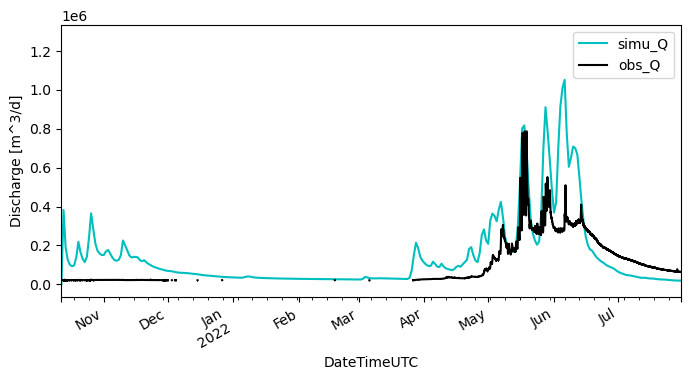

In [21]:
fig,ax = plt.subplots(1,1, figsize=(8,4))
#simu_df['watershed boundary discharge [m^3/d]'].plot(color = 'c',ax=ax, label= "simu_Q")
simu_df['Discharge [m^3/d]'].plot(color = 'c',ax=ax, label= "simu_Q")

obs_df['Discharge [m^3/d]'].plot(color = 'k', ax=ax, label = "obs_Q")
ax.set_ylabel("Discharge [m^3/d]")
ax.legend()

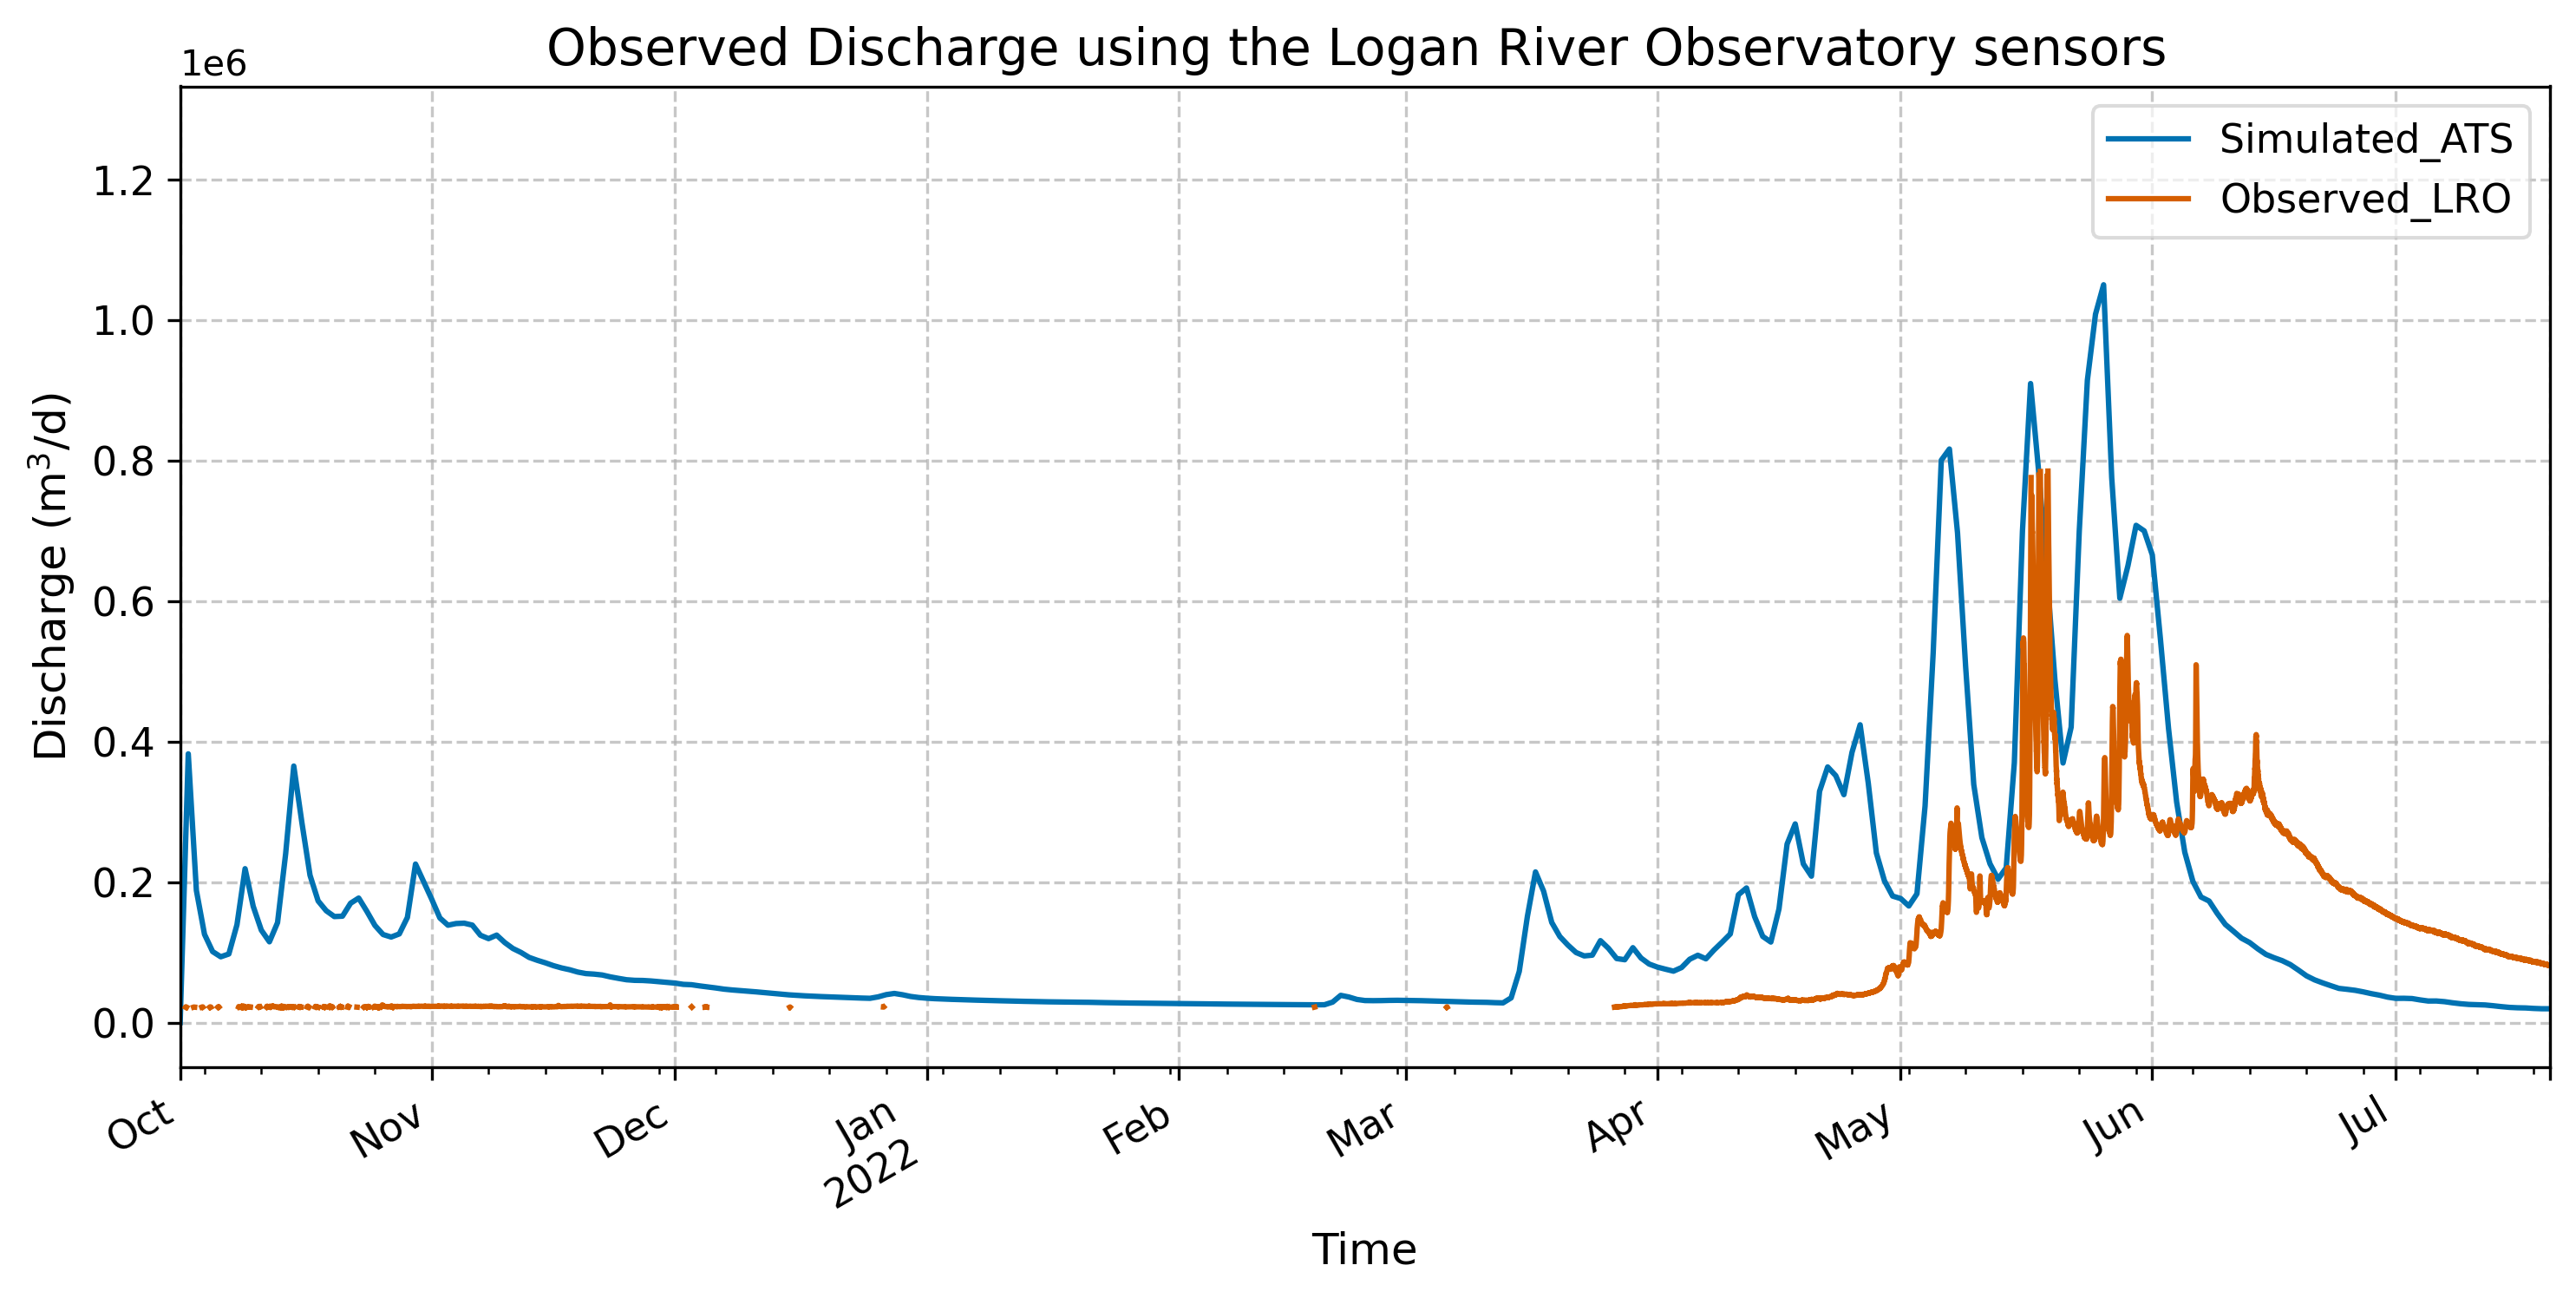

In [41]:
# Create a high-quality figure for publication
fig, ax = plt.subplots(1, 1, figsize=(10, 5), dpi=300)

# Plot simulated and observed discharge with clear, professional styling
simu_df['Discharge [m^3/d]'].plot(color='#0072B2', linewidth=1.5, ax=ax, label="Simulated_ATS")
obs_df['Discharge [m^3/d]'].plot(color='#D55E00', linewidth=1.5, ax=ax, label="Observed_LRO")

# Enhance axis labels and formatting
ax.set_ylabel("Discharge (m$^3$/d)", fontsize=12)
ax.set_xlabel("Time", fontsize=12)
ax.tick_params(axis='both', labelsize=11)

# Improve legend
ax.legend(loc='best', frameon=True, framealpha=0.7, fontsize=11)

# Add grid for easier reading
ax.grid(True, linestyle='--', alpha=0.7)



# Adjust layout
plt.tight_layout()

# Optional: add title if needed
#plt.title("Comparison of Simulated and Observed Discharge", fontsize=14)
plt.title("Observed Discharge using the Logan River Observatory sensors ", fontsize=14)

# Optional: Save the figure
fig.savefig('../figures/time-series.png',dpi=300)

## Flow Duration Curve (FDC) comparison

The flow duration curve is a plot that shows the percentage of time that flow in a stream is likely to equal or exceed some specified value of interest (also called "exceedance probability). For example, it can be used to show the percentage of time river flow can be expected to exceed a design flow of some specified value (e.g., 20 cfs), or to show the discharge of the stream that occurs or is exceeded some percent of the time (e.g., 80% of the time). See [reference](https://streamflow.engr.oregonstate.edu/analysis/flow/index.htm) on how it's calculated.

In model validation, comparing observed and simulated FDCs shows how well a hydrological model reproduces the full range of flows (low, median, and high).

In [23]:
print(obs_df.index)

simu_df['DateTimeUTC'] = pd.to_datetime("2021-10-01") + pd.to_timedelta(simu_df['time [d]'], unit='D')
simu_df = simu_df.set_index('DateTimeUTC')


DatetimeIndex(['2021-01-01 07:00:00', '2021-01-01 07:15:00',
               '2021-01-01 07:30:00', '2021-01-01 07:45:00',
               '2021-01-01 08:00:00', '2021-01-01 08:15:00',
               '2021-01-01 08:30:00', '2021-01-01 08:45:00',
               '2021-01-01 09:00:00', '2021-01-01 09:15:00',
               ...
               '2024-01-01 04:30:00', '2024-01-01 04:45:00',
               '2024-01-01 05:00:00', '2024-01-01 05:15:00',
               '2024-01-01 05:30:00', '2024-01-01 05:45:00',
               '2024-01-01 06:00:00', '2024-01-01 06:15:00',
               '2024-01-01 06:30:00', '2024-01-01 06:45:00'],
              dtype='datetime64[ns]', name='DateTimeUTC', length=105119, freq=None)


In [24]:
print(obs_df.index.min(), obs_df.index.max())
print(simu_df.index.min(), simu_df.index.max())

2021-01-01 07:00:00 2024-01-01 06:45:00
2063-07-02 00:00:00 2064-04-19 00:00:00


In [25]:
# Convert simulation time [d] to datetime using the correct origin
simu_df['DateTimeUTC'] = pd.to_datetime("1980-01-01") + pd.to_timedelta(simu_df['time [d]'], unit='D')

# Set DateTimeUTC as index
simu_df.set_index('DateTimeUTC', inplace=True)
simu_df['Discharge [m^3/d]'] = simu_df['river discharge [mol d^-1]'] * 18.015 / 1e6
simu_df

,time [d],net runoff [mol d^-1],runoff only [mol d^-1],runon only [mol d^-1],river discharge [mol d^-1],net groundwater flux [mol d^-1],exfiltration [mol d^-1],rain precipitation [m d^-1],snow precipitation [m d^-1],surface evaporation [m d^-1],...,snowmelt [mm d^-1],watershed boundary discharge [m^3/d],watershed boundary discharge [m d^-1],total evapotranspiration [mm d^-1],snow water content [m],surface water content [m],subsurface water content [m],canopy water content [m],total water content [m],Discharge [m^3/d]
DateTimeUTC,,,,,,,,,,,,,,,,,,,,,
2021-10-01,15249.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.669604,3.796742,0.000000,4.466345,0.000000
2021-10-02,15250.0,2.123288e+10,2.123288e+10,0.0,2.123288e+10,-1.383608e-07,3.426322e+08,0.0,0.006291,0.000074,...,0.000000,382574.420322,0.005806,0.849436,0.005502,0.663817,3.796648,0.000013,4.465981,382510.339107
2021-10-03,15251.0,1.043861e+10,1.043861e+10,0.0,1.043861e+10,-1.272450e-07,4.392948e+09,0.0,0.000000,0.000000,...,0.000000,188082.985394,0.002855,0.127718,0.005375,0.662164,3.795447,0.000013,4.462998,188051.481494
2021-10-04,15252.0,6.971328e+09,6.971328e+09,0.0,6.971328e+09,-2.272182e-07,4.365431e+09,0.0,0.000000,0.000000,...,0.000000,125609.506524,0.001906,0.000000,0.005375,0.661451,3.794253,0.000013,4.461092,125588.466932
2021-10-05,15253.0,5.608069e+09,5.608069e+09,0.0,5.608069e+09,-5.704745e-07,3.847629e+09,0.0,0.000000,0.000000,...,0.171935,101046.281257,0.001534,0.000168,0.005203,0.661142,3.793201,0.000013,4.459558,101029.356005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-16,15537.0,1.167256e+09,1.167256e+09,0.0,1.167256e+09,1.093661e-07,4.525131e+08,0.0,0.000000,0.000102,...,0.000000,21031.634387,0.000319,2.766548,0.000000,0.657106,3.678335,0.000000,4.335442,21028.111588
2022-07-17,15538.0,1.153858e+09,1.153858e+09,0.0,1.153858e+09,1.256059e-08,4.494276e+08,0.0,0.000000,0.000134,...,0.000000,20790.225474,0.000316,2.828786,0.000000,0.656780,3.675517,0.000000,4.332297,20786.743111
2022-07-18,15539.0,1.115369e+09,1.115369e+09,0.0,1.115369e+09,4.050235e-08,5.011995e+08,0.0,0.000000,0.000182,...,0.000000,20096.730659,0.000305,2.891804,0.000000,0.656430,3.672670,0.000000,4.329101,20093.364457


In [26]:
# Check the time range of observed data
print("Observed data range:")
print(f"Start: {obs_df.index.min()}")
print(f"End: {obs_df.index.max()}")
print(f"Frequency: {pd.infer_freq(obs_df.index)}")
print(f"Total points: {len(obs_df)}")
print(f"Non-NaN points: {len(obs_df.dropna(subset=['Discharge [m^3/d]']))}")

# Check the time range of simulated data
print("\nSimulated data range:")
print(f"Start: {simu_df.index.min()}")
print(f"End: {simu_df.index.max()}")
print(f"Frequency: {pd.infer_freq(simu_df.index)}")
print(f"Total points: {len(simu_df)}")
print(f"Non-NaN points: {len(simu_df.dropna(subset=['Discharge [m^3/d]']))}")

# Check min/max values
print("\nValue ranges:")
print(f"Observed min: {obs_df['Discharge [m^3/d]'].min()}")
print(f"Observed max: {obs_df['Discharge [m^3/d]'].max()}")
print(f"Simulated min: {simu_df['Discharge [m^3/d]'].min()}")
print(f"Simulated max: {simu_df['Discharge [m^3/d]'].max()}")

Observed data range:
Start: 2021-01-01 07:00:00
End: 2024-01-01 06:45:00
Frequency: None
Total points: 105119
Non-NaN points: 71953

Simulated data range:
Start: 2021-10-01 00:00:00
End: 2022-07-20 00:00:00
Frequency: D
Total points: 293
Non-NaN points: 293

Value ranges:
Observed min: 15255.826659061067
Observed max: 1269268.5483234462
Simulated min: 0.0
Simulated max: 1050227.8187387995


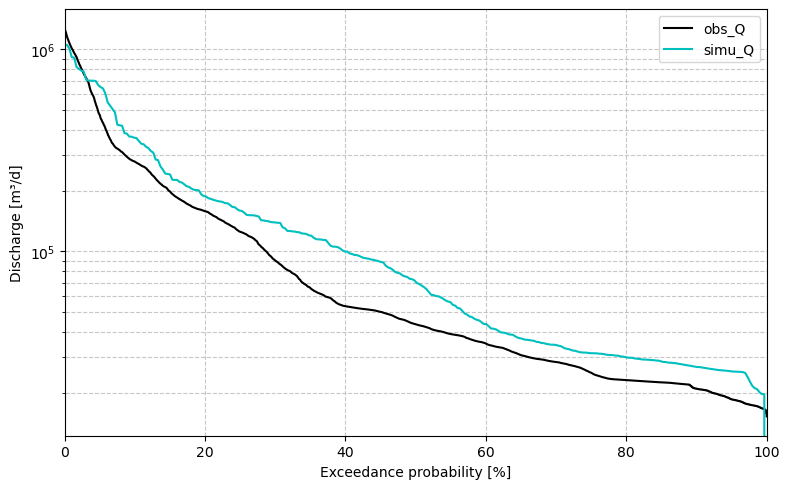

In [28]:
import numpy as np
import matplotlib.pyplot as plt

def create_fdc(data, label, color):
    # Remove NaNs
    valid_data = data.dropna()
    # Sort data in descending order
    sorted_data = np.sort(valid_data.values)[::-1]
    # Calculate exceedance probabilities
    n = len(sorted_data)
    exceedance = np.arange(1, n+1) / n * 100
    # Return for plotting
    return exceedance, sorted_data, label, color

# Get FDC data
obs_exceedance, obs_values, obs_label, obs_color = create_fdc(
    obs_df['Discharge [m^3/d]'], 'obs_Q', 'k')
simu_exceedance, simu_values, simu_label, simu_color = create_fdc(
    simu_df['Discharge [m^3/d]'], 'simu_Q', 'c')

# Create plot
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(obs_exceedance, obs_values, color=obs_color, label=obs_label)
ax.plot(simu_exceedance, simu_values, color=simu_color, label=simu_label)

# Set log scale for y-axis
ax.set_yscale('log')
ax.set_xlabel('Exceedance probability [%]')
ax.set_ylabel('Discharge [m³/d]')
ax.set_xlim(0, 100)
ax.grid(True, which='both', linestyle='--', alpha=0.7)
ax.legend()
plt.tight_layout()

# Optional: Save the figure
fig.savefig('../figures/Flow Duration Curve (FDC) comparison.png',dpi=300)

## One-to-one plot

One to one scatter plot with metrics.

Number of matching daily values: 186
Metrics: R² = -1.476, NSE = -1.476, KGE = -0.125, PBIAS = 73.9%


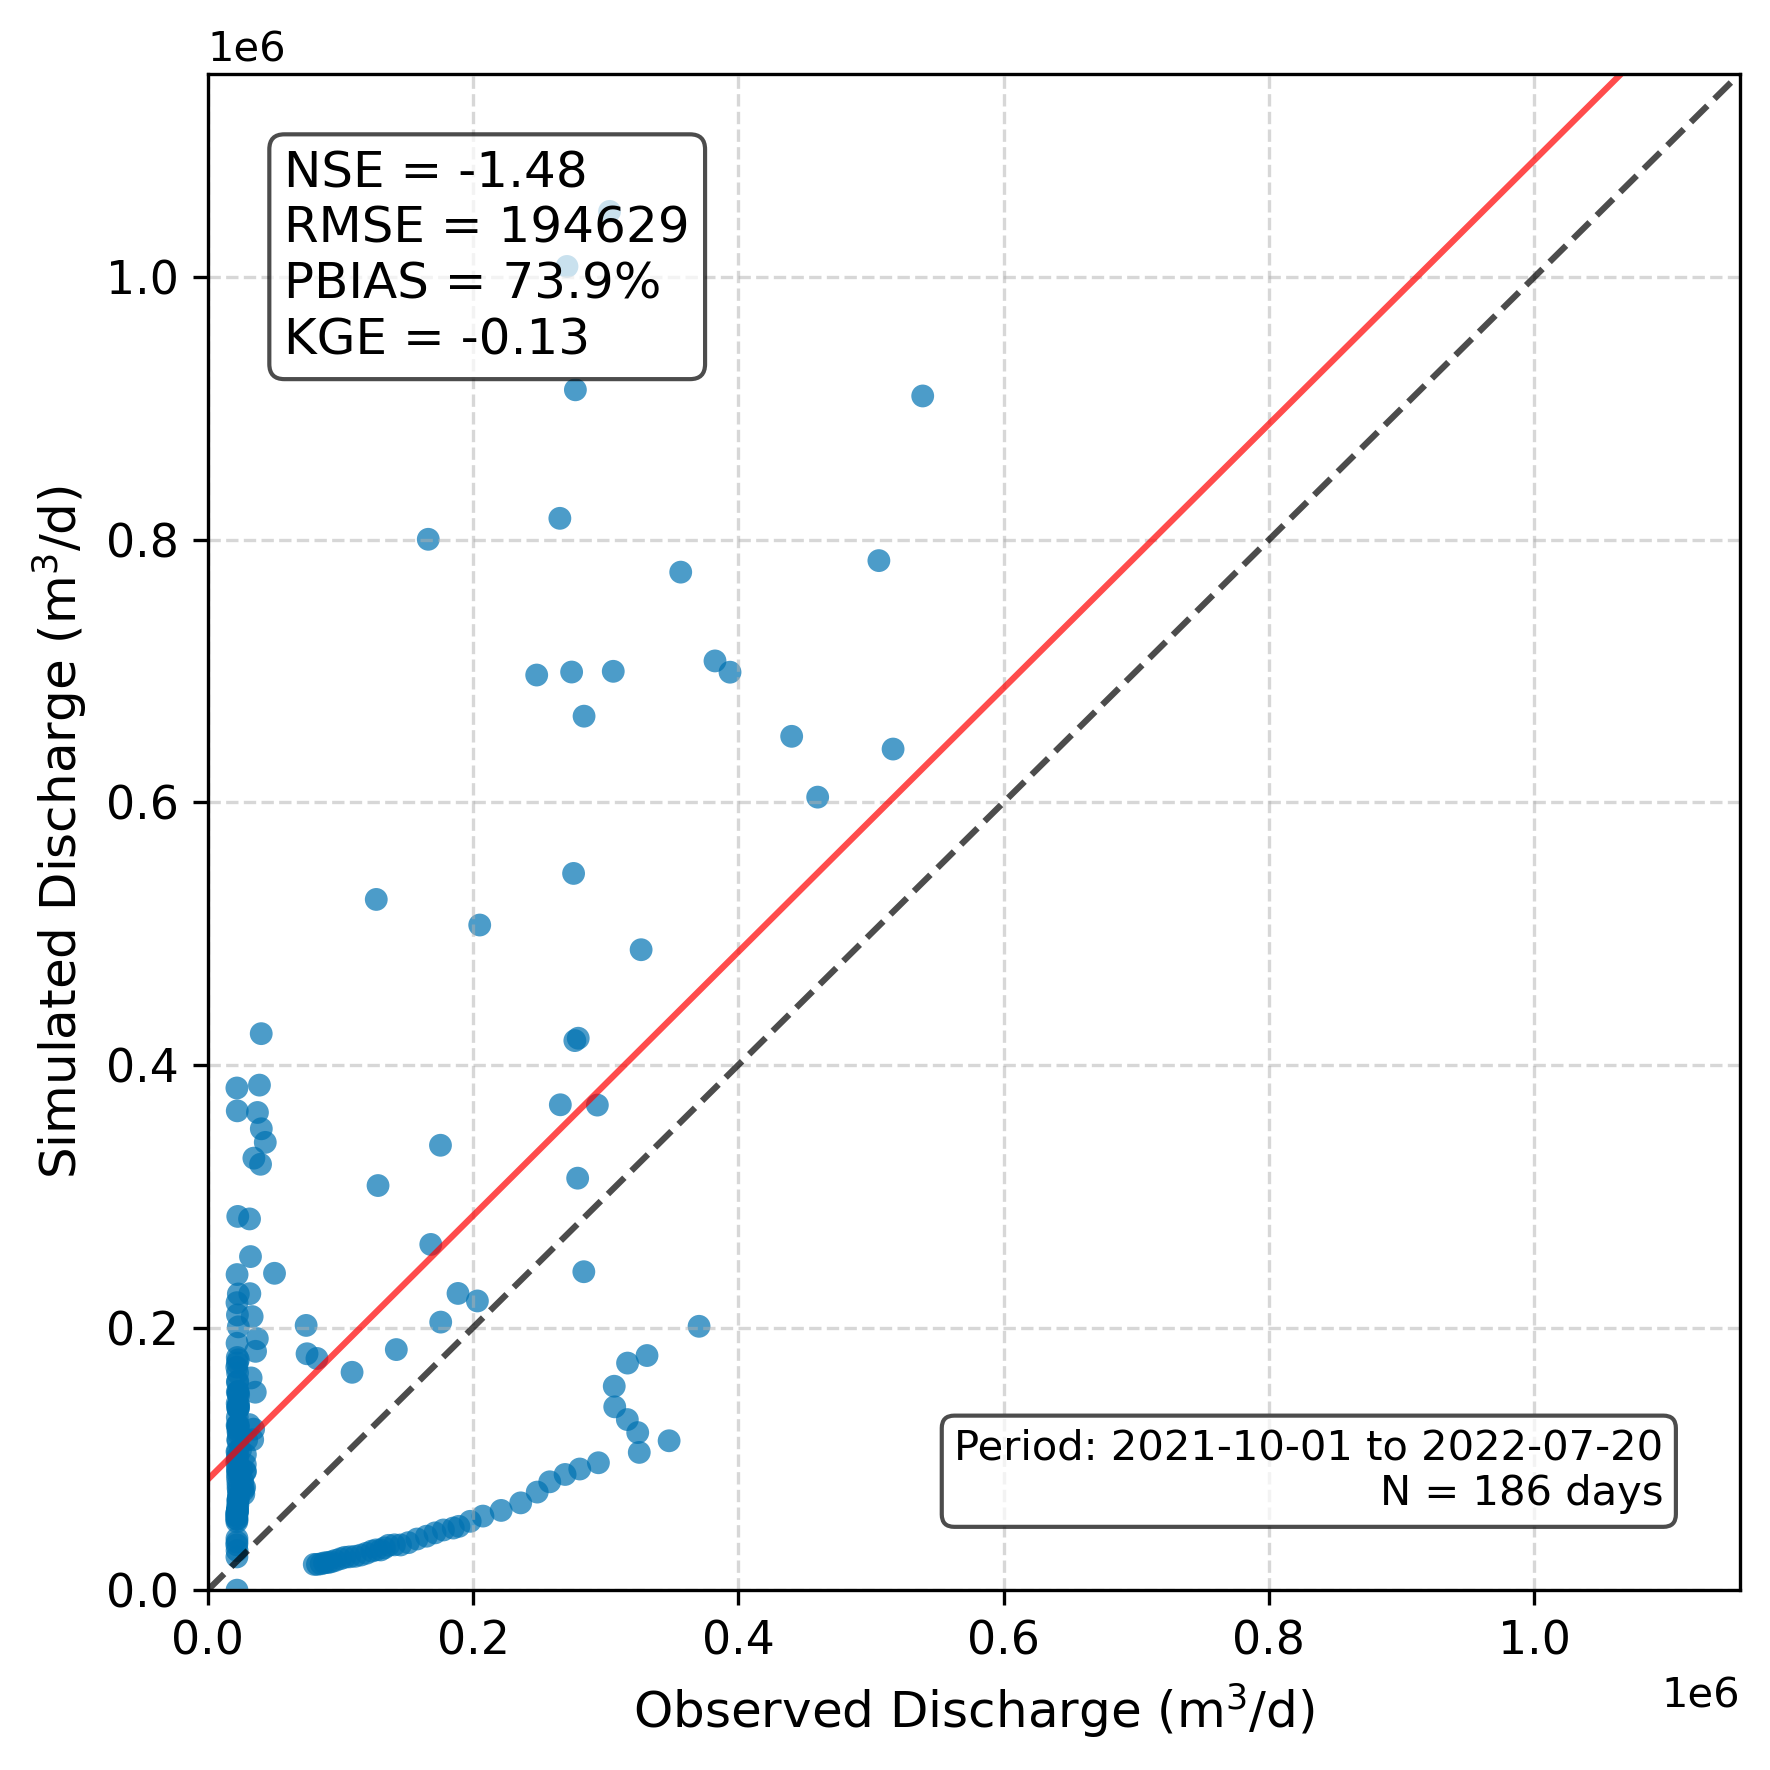

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import r2_score

# 1. Resample observed data to daily frequency to match simulated data
daily_obs = obs_df['Discharge [m^3/d]'].resample('D').mean()

# 2. Align the two time series by index
common_idx = daily_obs.index.intersection(simu_df.index)
obs_aligned = daily_obs.loc[common_idx]
simu_aligned = simu_df.loc[common_idx, 'Discharge [m^3/d]']

# 3. Remove any remaining NaN values
valid_data = pd.DataFrame({
    'Observed': obs_aligned,
    'Simulated': simu_aligned
}).dropna()

print(f"Number of matching daily values: {len(valid_data)}")

# 4. Compute metrics and plot
if len(valid_data) > 0:
    # R²
    r2 = r2_score(valid_data['Observed'], valid_data['Simulated'])
    
    # NSE
    mean_obs = valid_data['Observed'].mean()
    nse = 1 - (np.sum((valid_data['Observed'] - valid_data['Simulated'])**2) /
               np.sum((valid_data['Observed'] - mean_obs)**2))
    
    # RMSE
    rmse = np.sqrt(np.mean((valid_data['Observed'] - valid_data['Simulated'])**2))
    
    # PBIAS
    bias = np.mean(valid_data['Simulated'] - valid_data['Observed'])
    pbias = bias / np.mean(valid_data['Observed']) * 100
    
    # KGE
    r = np.corrcoef(valid_data['Observed'], valid_data['Simulated'])[0, 1]
    alpha = np.std(valid_data['Simulated']) / np.std(valid_data['Observed'])
    beta = np.mean(valid_data['Simulated']) / np.mean(valid_data['Observed'])
    kge = 1 - np.sqrt((r - 1)**2 + (alpha - 1)**2 + (beta - 1)**2)
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(6, 6), dpi=300)
    
    # Find min and max for equal axes
    max_val = max(valid_data['Observed'].max(), valid_data['Simulated'].max()) * 1.1
    min_val = min(valid_data['Observed'].min(), valid_data['Simulated'].min()) * 0.9
    if min_val <= 0:
        min_val = 0
    
    # Scatter plot
    ax.scatter(valid_data['Observed'], valid_data['Simulated'],
               color='#0072B2', alpha=0.7, s=30, edgecolor='none')
    
    # 1:1 line
    ax.plot([min_val, max_val], [min_val, max_val], 'k--', lw=1.5, alpha=0.7)
    
    # Regression line
    slope, intercept, r_value, p_value, std_err = stats.linregress(valid_data['Observed'], valid_data['Simulated'])
    x_vals = np.array([min_val, max_val])
    y_vals = intercept + slope * x_vals
    ax.plot(x_vals, y_vals, 'r-', lw=1.5, alpha=0.7)
    
    # Axes settings
    ax.set_xlim(min_val, max_val)
    ax.set_ylim(min_val, max_val)
    ax.set_xlabel("Observed Discharge (m$^3$/d)", fontsize=12)
    ax.set_ylabel("Simulated Discharge (m$^3$/d)", fontsize=12)
    ax.tick_params(axis='both', labelsize=11)
    ax.grid(True, linestyle='--', alpha=0.5)
    
    # Metrics box (top left)
    metrics_text = (
        #f"$R^2$ = {r2:.2f}\n"
        f"NSE = {nse:.2f}\n"
        f"RMSE = {rmse:.0f}\n"
        f"PBIAS = {pbias:.1f}%\n"
        f"KGE = {kge:.2f}"
    )
    ax.text(0.05, 0.95, metrics_text, transform=ax.transAxes,
            va='top', ha='left', fontsize=12,
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))
    
    # Period box (bottom right)
    period_text = f"Period: {common_idx.min().date()} to {common_idx.max().date()}\nN = {len(valid_data)} days"
    ax.text(0.95, 0.05, period_text, transform=ax.transAxes,
            va='bottom', ha='right', fontsize=10,
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))
    
    plt.tight_layout()
    
    print(f"Metrics: R² = {r2:.3f}, NSE = {nse:.3f}, KGE = {kge:.3f}, PBIAS = {pbias:.1f}%")
    
    # Optional: Save the figure
    fig.savefig('../figures/one-one plot.png', dpi=300)
else:
    print("No matching time periods with valid data found.")


# Optional: Save the figure
fig.savefig('../figures/2.png',dpi=300)